### [N-Queen](https://school.programmers.co.kr/learn/courses/30/lessons/12952)

- 시간복잡도를 충족하기 위해선 2차원 매트릭스가 아닌 1차원 매트릭스로 계산해야함  
- 모든 퀸은 같은 행/열에 존재할 수 없으므로, 이를 1차원으로 압축해 표현하고 이를 고려한 코드를 적용하면 복잡도 문제 해결 가능

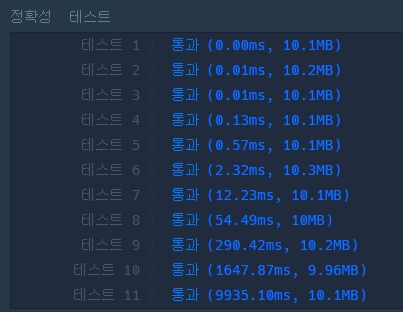

In [31]:
def is_safe(board, row, col, n):
    # 이전 행들에 대해 체크
    for i in range(row):
        # 같은 열에 있거나, 대각선에 있는지 확인
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

def solve_n_queens(n, board, row):
    if row == n:  # 모든 퀸을 배치한 경우
        print(board)
        return 1
    
    count = 0
    for col in range(n):
        if is_safe(board, row, col, n):
            board[row] = col  # 퀸 배치
            count += solve_n_queens(n, board, row + 1)  # 다음 행으로 이동
            board[row] = -1  # 백트래킹을 위해 초기화
    
    return count

def solution(n):
    board = [-1] * n  # 초기화된 체스판 (각 행에 퀸의 위치를 나타냄)
    return solve_n_queens(n, board, 0)

In [35]:
solution(5)

[0]


1

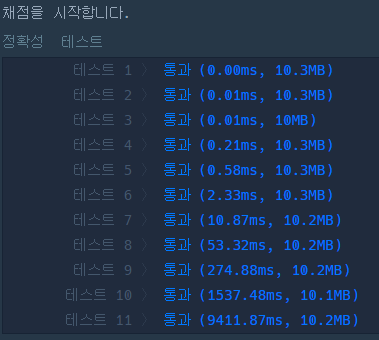

In [ ]:
def solution(n):
    def is_not_under_attack(row, col):
        # 이전 행들에 대해 공격 가능 여부를 판단
        for prev_row in range(row):
            # 같은 열에 있거나, 대각선에 있는 경우
            if cols[prev_row] == col or \
               abs(cols[prev_row] - col) == abs(prev_row - row):
                return False
        return True
    
    def place_queens(row):
        if row == n:
            # 모든 퀸을 배치 완료
            nonlocal count
            count += 1
            return
        
        for col in range(n):
            if is_not_under_attack(row, col):
                cols[row] = col  # 퀸을 배치
                place_queens(row + 1)
                cols[row] = -1  # 퀸을 제거 (백트래킹)
    
    count = 0
    cols = [-1] * n
    place_queens(0)
    return count


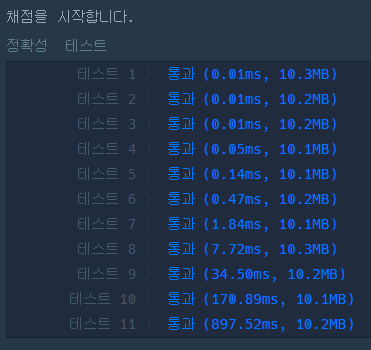

- 더 빠르게 할 수 없을까?  

=> 두 개의 리스트를 이용해 탐색이 아닌 기울기를 고려해 왼쪽 대각선과 오른쪽 대각선을 체크  
=> 왼쪽 대각선은 'row - col'값이 같으면 충돌하고, 오른쪽 대각선은 'row + col'값이 같으면 충돌  
=> 이를 통해 O(n) 연산을 O(1)로 줄임

복습!

In [38]:
def solution(n):
    def place_queens(row):
        nonlocal count
        if row == n:
            count += 1
            return
        
        for col in range(n):
            if not cols[col] and not left_diagonal[row - col] and not right_diagonal[row + col]:
                # 퀸 배치
                cols[col] = left_diagonal[row - col] = right_diagonal[row + col] = True
                place_queens(row + 1)
                # 퀸 제거 (백트래킹)
                cols[col] = left_diagonal[row - col] = right_diagonal[row + col] = False
    
    count = 0
    cols = [False] * n
    left_diagonal = [False] * (2 * n - 1)
    right_diagonal = [False] * (2 * n - 1)
    
    place_queens(0)
    return count


In [39]:
solution(5)

10

### [이중우선순위큐](https://school.programmers.co.kr/learn/courses/30/lessons/42628)

- 이중이니까 그냥 두 개 이용해서 하는게 제일 나음

In [92]:
import heapq

def solution(operations):
    
    small, big = [], []
    heapq.heapify(small), heapq.heapify(big)
    
    for operation in operations:
        op, num = operation.split()
        if op == 'I':
            value = int(num)
            heapq.heappush(small, value), heapq.heappush(big, -value)
        elif small:
            if num == '-1':
                v = heapq.heappop(small)
                big.remove(-v)
            elif num == '1':
                v = heapq.heappop(big)
                small.remove(-v)

    if not small:
        return [0,0]
    else :
        return [-heapq.heappop(big), heapq.heappop(small)]

In [93]:
operations = ["I 16", "I -5643", "D -1", "D 1", "D 1", "I 123", "D -1"]
solution(operations)

[0, 0]

### [숫자 블록](https://school.programmers.co.kr/learn/courses/30/lessons/12923)

- 결국 최대공약수를 찾는 문제와 같으며, 이때 n = a x b라고 할 때,  
  a와 b 중 하나는 반드시 sqrt(n) 이하에 존재하게 되므로 거기까지만 탐색

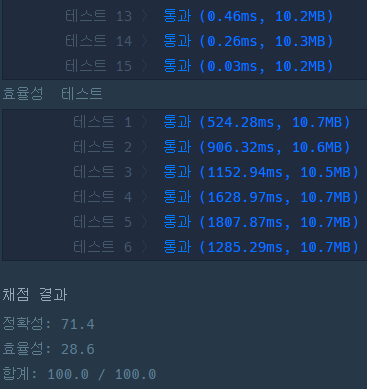

In [22]:
def solution(begin, end):
    answer = []
    
    for num in range(begin, end+1):
        if num == 1:
            answer.append(0)
            continue
        
        v = 1  # 1은 모든 수의 약수이기 때문에 초기값을 1로 설정
        for i in range(2, int(num ** 0.5) + 1):
            if num % i == 0:
                v = num // i
                # v가 10,000,000 이하인지 확인
                if v <= 10_000_000:
                    break
                else:
                    v = i  # i를 선택
        answer.append(v)
    
    return answer


In [23]:
solution(477559014, 477559014)

[6]

In [24]:
def maxdivisor(numb):
    if numb == 1:
        return 0
    ans = [1]
    for i in range(2, int(numb**(1/2)) + 1):
        if (numb % i == 0) and i <= 1e7:
            ans.append(i)
            if numb//i <= 1e7 and numb//i != numb:
                ans.append((numb // i))
    return max(ans)

def solution(begin, end):
    answer = []
    for i in range(begin,end+1):
        answer.append(maxdivisor(i))
    return answer

In [25]:
solution(477559014, 477559014)

[6]

### [행렬의 곱셈](https://school.programmers.co.kr/learn/courses/30/lessons/12949)
- programmers 추천

In [31]:
import numpy as np

def solution(arr1, arr2):
    arr1, arr2 = np.array(arr1), np.array(arr2)
    answer =  (arr1 @ arr2).tolist()
    return answer

In [32]:
arr1 = [[1, 4], [3, 2], [4, 1]]
arr2 = [[3, 3], [3, 3]]

In [33]:
solution(arr1, arr2)

[[15, 15], [15, 15], [15, 15]]

### [점프와 순간이동](https://school.programmers.co.kr/learn/courses/30/lessons/12980)
- 프로그래머스 추천

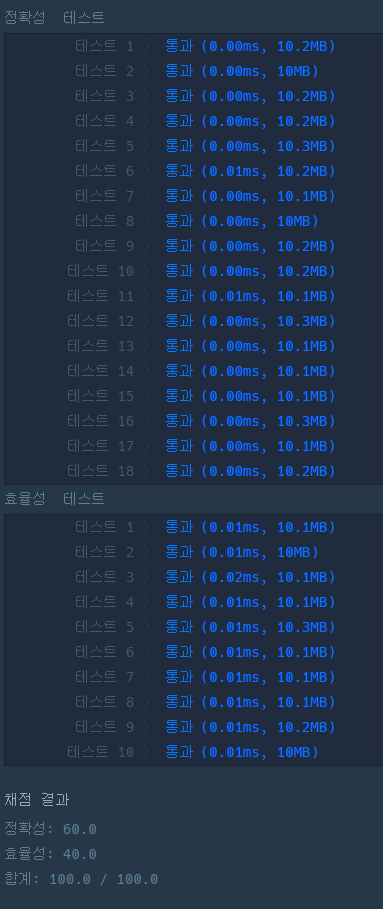

In [ ]:
def solution(n):
    answer = 0
    while n > 0:
        if n % 2 == 0:
            n //= 2
        else:
            n -= 1
            answer += 1
    return answer

- 다른 사람의 풀이  
  결국 2로 나누는 걸 세는 거니까 2진법으로 생각해서 1을 세는 방식으로

In [ ]:
def solution(n):
    return bin(n).count('1')

### [요격 시스템](https://school.programmers.co.kr/learn/courses/30/lessons/181188)

In [15]:
def solution(targets):
    # 작은 s 지점을 기준으로 정렬
    targets = sorted(targets, key=lambda x: x[0])
    # 현재 겹치는 범위의 끝 지점, 필요한 미사일 개수
    cur, answer = 0, 0
    for target in targets:
        s, e = target
        if cur > s: # 한 번에 요격할 수 있음
            cur = min(cur, e) # 새로운 폭격의 범위가 좁을 경우 업데이트
            continue
        elif cur <= s: # 한 번에 요격할 수 없는 범위
            answer += 1
            cur = e
    return answer

In [16]:
targets = [[4, 5], [4, 8], [10, 14], [11, 13], [5, 12], [3, 7], [1, 4]]
solution(targets)

3

### [귤 고르기](https://school.programmers.co.kr/learn/courses/30/lessons/138476)

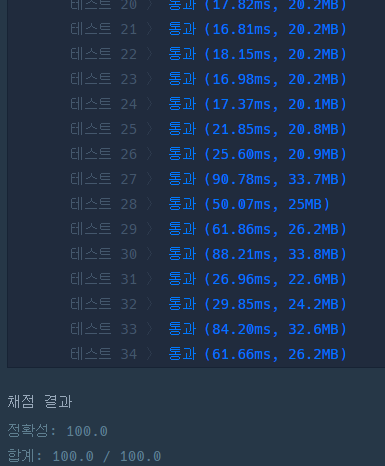

In [112]:
def solution(k, tangerine):
    target = {x:0 for x in range(100_000+1)}
    for t in tangerine:
        try:
            target[t] += 1
        except:
            target[t] = 1
        
    target = [(x[0], x[1]) for x in target.items() if x[1] > 0]
    target = sorted(target, key=lambda x: x[1], reverse=True)
    answer = 0
    for t in target:
        _, cnt = t
        k -= cnt
        answer += 1
        if k <= 0:
            return answer

- Counter를 활용해 더 빠르게  
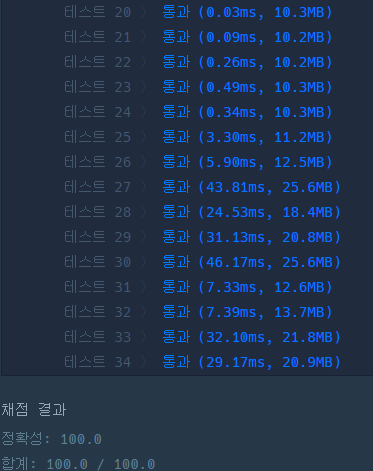

In [132]:
from collections import Counter

def solution(k, tangerine):
    counter = sorted([x for x in Counter(tangerine).items()], key=lambda x : x[1], reverse=True)
    answer = 0
    for t in counter:
        _, cnt = t
        k -= cnt
        answer += 1
        if k <= 0:
            return answer

In [133]:
k, tangerine = 	4, [1, 3, 2, 5, 4, 5, 2, 3]
solution(k, tangerine)

2

### [할인행사](https://school.programmers.co.kr/learn/courses/30/lessons/131127)

In [175]:
from collections import deque

def solution(want, number, discount):
    cur = deque([])
    plan = deque(discount)
    needs = {x:y for x, y in zip(want, number)}
    for _ in range(10):
        t = plan.popleft()
        cur.append(t)
        if t in want:
            needs[t] -= 1
        
    if not any(needs.values()):
        answer = 1
    else :
        answer = 0
        
    while plan:
        past = cur.popleft()
        soon = plan.popleft()
        cur.append(soon)
        if past in needs:
            needs[past] += 1
        if soon in needs :
            needs[soon] -= 1
            
        if not any(needs.values()):
            answer += 1
            
    return answer

In [192]:
want, number, discount = ["banana", "apple", "rice", "pork", "pot"], [3, 2, 2, 2, 1], ["chicken", "apple", "apple", "banana", "rice", "apple", "pork", "banana", "pork", "rice", "pot", "banana", "apple", "banana"]
solution(want, number, discount)

3